Notebook Color Scheme:


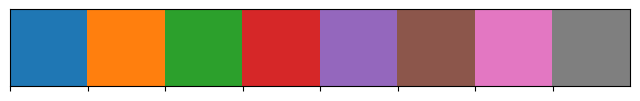

In [2]:
# Environment setup
import os
import gc
import warnings
import time
import random
import math
import glob

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import spatial
from tqdm import tqdm
from PIL import Image

from IPython.display import display_html, Image as IPImage
from wordcloud import WordCloud, STOPWORDS

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import cv2
import wandb

from bokeh.io import output_notebook, show
from bokeh.plotting import figure
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.transform import factor_cmap
from bokeh.layouts import gridplot

# Update matplotlib parameters
plt.rcParams.update({'font.size': 16})

# Environment setup
warnings.filterwarnings("ignore")
os.environ["WANDB_SILENT"] = "true"
CONFIG = {'competition': 'HandM', '_wandb_kernel': 'aot'}

# Define custom colors
class Color:
    START = '\033[1m' + '\033[92m'  # Changed to green
    END = '\033[0m'

# Define new custom color palette
my_colors = [
    "#1F77B4", "#FF7F0E", "#2CA02C", 
    "#D62728", "#9467BD", "#8C564B", 
    "#E377C2", "#7F7F7F"
]

# Display notebook color scheme
print(Color.START + "Notebook Color Scheme:" + Color.END)
sns.palplot(sns.color_palette(my_colors))
plt.show()

pd.set_option('display.max_columns', 50)

In [3]:
'''
# Upload kaggle.json
files.upload()
# Create .kaggle directory and move kaggle.json
mkdir -p ~/.kaggle
cp kaggle.json ~/.kaggle/
chmod 600 ~/.kaggle/kaggle.json


# Download the dataset
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations
!unzip h-and-m-personalized-fashion-recommendations.zip -d ./hm_dataset
'''

'\n# Upload kaggle.json\nfiles.upload()\n# Create .kaggle directory and move kaggle.json\nmkdir -p ~/.kaggle\ncp kaggle.json ~/.kaggle/\nchmod 600 ~/.kaggle/kaggle.json\n\n\n# Download the dataset\n!kaggle competitions download -c h-and-m-personalized-fashion-recommendations\n!unzip h-and-m-personalized-fashion-recommendations.zip -d ./hm_dataset\n'

In [4]:
%%time
transactions = pd.read_csv('/Users/girimanoharv/Documents/HM_datasets/transactions_train.csv'), 
articles = pd.read_csv('/Users/girimanoharv/Documents/HM_datasets/articles.csv')
customers = pd.read_csv('/Users/girimanoharv/Documents/HM_datasets/customers.csv')
ss = pd.read_csv('/Users/girimanoharv/Documents/HM_datasets/sample_submission.csv')

In [ ]:
transactions

In [ ]:
transactions = transactions[0]

In [ ]:
# Custom colors for print statements
class Color:
    GOLD = '\033[33m'
    RESET = '\033[0m'

def display_df_info(df, name):
    if isinstance(df, pd.DataFrame):
        print(f"{Color.GOLD}{name}:{Color.RESET} {df.shape}")
        null_values = df.isnull().sum().sum()
        print(f"{Color.GOLD}Null values in {name}:{Color.RESET} {null_values}")
        display_html(df.head())
    else:
        print(f"{Color.GOLD}{name}:{Color.RESET} is not a DataFrame, it is of type {type(df)}")

# Display shape, null values, and head of DataFrames
display_df_info(articles, "ARTICLES")
display_df_info(customers, "CUSTOMERS")
display_df_info(transactions, "TRANSACTIONS")
display_df_info(ss, "SAMPLE_SUBMISSION")

In [ ]:
for col in articles.columns:
    if not 'no' in col and not 'code' in col and not 'id' in col:
        un_n = articles[col].nunique()
        print(f'Unique values in -{col}- column: {un_n}')


In [ ]:
# Check for missing values in the 'detail_desc' column and print the total count
print(f"There are no missing values in other columns only the 'Detail Description' column has: {articles['detail_desc'].isna().sum()} total missing values")

# Replace missing values in the 'detail_desc' column with "No Description"
articles['detail_desc'].fillna(value="No Description", inplace=True)

# Adjust the article ID and product code to be strings and add "0"
articles["article_id"] = articles["article_id"].apply(lambda x: str(x).zfill(10))
articles["product_code"] = articles["article_id"].apply(lambda x: x[:3])


In [ ]:
'''
# Handle null values
articles_cleaned = articles.copy()

# Drop rows with any null values
articles_dropped = articles_cleaned.dropna()
print(f"After dropping rows with null values: {articles_dropped.shape}")

# Fill null values with 'Unknown' for categorical columns and mean for numerical columns
for column in articles_cleaned.columns:
    if articles_cleaned[column].dtype == 'object':
        articles_cleaned[column].fillna('Unknown', inplace=True)
    else:
        articles_cleaned[column].fillna(articles_cleaned[column].mean(), inplace=True)

print(f"Null values after cleaning: {articles_cleaned.isnull().sum().sum()}")

# Display cleaned DataFrame
display_html(articles_cleaned.head())
'''

In [ ]:

import glob
# Find all image paths in the specified directory
all_image_paths = glob.glob("/Users/girimanoharv/Documents/hm_images/*/*")

num_unique_article_ids = len(articles['article_id'].unique())
num_unique_images = len(all_image_paths)

# Print results
print(f"Number of unique article_ids within articles.csv: {num_unique_article_ids}")
print(f"Number of unique images within the image folder: {num_unique_images}")


In [ ]:
# Assuming `all_image_paths` contains the paths to all images
all_image_paths = glob.glob("/Users/girimanoharv/Documents/HM_datasets/hm_images/*/*")

# Create a set of valid image IDs
all_image_ids = set()
for path in tqdm(all_image_paths):
    article_id = os.path.basename(path).split('.')[0]
    all_image_ids.add(article_id)

In [ ]:
articles_cleaned = articles

In [ ]:
# Create full path to the article image
images_path = "/Users/girimanoharv/Documents/HM_datasets/hm_images/"
articles_cleaned["path"] = images_path + articles_cleaned["product_code"].astype(str) + "/" + articles_cleaned["article_id"].astype(str) + ".jpg"


# Display the first few rows to verify the paths
display_html(articles_cleaned.head())

In [ ]:
# Adjust the incorrect paths and set them to None
articles["path"] = articles.apply(lambda row: None if row["article_id"] not in all_image_ids else row["path"], axis=1)


In [ ]:
'''
categorical_columns = articles_cleaned.select_dtypes(include=['object']).columns
for column in categorical_columns:
    articles_cleaned = articles_cleaned[articles_cleaned[column] != 'Unknown']

print(f"After dropping rows with 'Unknown': {articles_cleaned.shape}")
'''

In [ ]:

output_notebook()

# Display total number of unique product names
print(f"Total Number of unique Product Names: {articles['prod_name'].nunique()}")

# Data preparation
prod_name_counts = articles["prod_name"].value_counts().reset_index().head(15)
prod_name_counts.columns = ['prod_name', 'count']
total_prod_names = articles["prod_name"].nunique()
color_palette = ["#CB2170" if x == max(prod_name_counts["count"]) else '#954E93' for x in prod_name_counts["count"]]

# Get images for most frequent product names
prod_name_images = articles[articles["prod_name"].isin(prod_name_counts["prod_name"].tolist())].groupby("prod_name")["path"].first().reset_index()
image_paths = prod_name_images["path"].tolist()
image_names = prod_name_images["prod_name"].tolist()

# Bokeh for bar plot
source = ColumnDataSource(prod_name_counts)

p = figure(x_range=prod_name_counts["prod_name"].tolist(), height=400, width=800, title="- Most Frequent Product Names -",
           toolbar_location=None, tools="")

p.vbar(x='prod_name', top='count', width=0.9, source=source, line_color='white', fill_color=factor_cmap('prod_name', palette=color_palette, factors=prod_name_counts["prod_name"].tolist()))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis.axis_label = "Count"
p.xaxis.major_label_orientation = 1.2

hover = HoverTool()
hover.tooltips = [("Product Name", "@prod_name"), ("Count", "@count")]
p.add_tools(hover)

show(p)


In [ ]:

output_notebook()

# Ensure detail_desc is a string
print(f"Total Number of unique Product Names: {articles['prod_name'].nunique()}")

# Data preparation
prod_name_counts = articles["prod_name"].value_counts().reset_index().head(15)
prod_name_counts.columns = ['prod_name', 'count']
total_prod_names = articles["prod_name"].nunique()
color_palette = ["#CB2170" if x == max(prod_name_counts["count"]) else '#954E93' for x in prod_name_counts["count"]]

# Get images for most frequent product names
prod_name_images = articles[articles["prod_name"].isin(prod_name_counts["prod_name"].tolist())].groupby("prod_name")["path"].first().reset_index()
image_paths = prod_name_images["path"].tolist()
image_names = prod_name_images["prod_name"].tolist()

# Bokeh for bar plot
source = ColumnDataSource(prod_name_counts)

p = figure(x_range=prod_name_counts["prod_name"].tolist(), height=400, width=800, title="- Most Frequent Product Names -",
           toolbar_location=None, tools="")

p.vbar(x='prod_name', top='count', width=0.9, source=source, line_color='white', fill_color=factor_cmap('prod_name', palette=color_palette, factors=prod_name_counts["prod_name"].tolist()))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis.axis_label = "Count"
p.xaxis.major_label_orientation = 1.2

hover = HoverTool()
hover.tooltips = [("Product Name", "@prod_name"), ("Count", "@count")]
p.add_tools(hover)

show(p)


In [ ]:
# Display example images using Matplotlib
fig, axs = plt.subplots(4, 4, figsize=(23, 8))
fig.suptitle('- Product Images -', size=22, weight="bold")
axs = axs.flatten()

for k, (path, name) in enumerate(zip(image_paths, image_names)):
    if path is not None:
        img = plt.imread(path)
        axs[k].imshow(img)
        axs[k].set_title(f"{name}", size=16)
        axs[k].axis("off")

plt.tight_layout()
plt.show()


In [ ]:

output_notebook()

# Display total number of unique product types
print(f"Total Number of unique Product Types: {articles['product_type_name'].nunique()}")

# Data preparation
prod_type_counts = articles["product_type_name"].value_counts().reset_index().head(15)
prod_type_counts.columns = ['product_type_name', 'count']
total_prod_types = articles["product_type_name"].nunique()
color_palette = ["#00BDE3" if x == max(prod_type_counts["count"]) else '#398BBB' for x in prod_type_counts["count"]]

# Get images for most frequent product types
prod_type_images = articles[articles["product_type_name"].isin(prod_type_counts["product_type_name"].tolist())].groupby("product_type_name")["path"].first().reset_index()
image_paths = prod_type_images["path"].tolist()
image_names = prod_type_images["product_type_name"].tolist()

# Bokeh for bar plot
source = ColumnDataSource(prod_type_counts)

p = figure(x_range=prod_type_counts["product_type_name"].tolist(), height=400, width=800, title="- Most Frequent Product Types -",
           toolbar_location=None, tools="")

p.vbar(x='product_type_name', top='count', width=0.9, source=source, line_color='white', fill_color=factor_cmap('product_type_name', palette=color_palette, factors=prod_type_counts["product_type_name"].tolist()))

p.xgrid.grid_line_color = None
p.y_range.start = 0
p.yaxis.axis_label = "Count"
p.xaxis.major_label_orientation = 1.2

hover = HoverTool()
hover.tooltips = [("Product Type", "@product_type_name"), ("Count", "@count")]
p.add_tools(hover)

show(p)


In [ ]:
import pandas as pd
import numpy as np
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
import plotly.graph_objects as go
import base64
from io import BytesIO

# Display total number of unique article descriptions
print(f"Total Number of unique Article Descriptions: {articles['detail_desc'].nunique()}\n")

# Get descriptions and convert them to a single string
text = " ".join(articles["detail_desc"].dropna().unique())

# Load the mask image
mask_path = "/Users/girimanoharv/Documents/HM_Datasets/hm_images/022/0224314013.jpg"  
mask = np.array(Image.open(mask_path))

# Create word cloud object
wc = WordCloud(mask=mask, background_color="white", max_words=2000,
               stopwords=STOPWORDS, max_font_size=256,
               random_state=42, width=mask.shape[1],
               height=mask.shape[0]) 

# Generate the word cloud
wc.generate(text)

# Convert word cloud to image and then to base64 string
wc_image = wc.to_image()
buffered = BytesIO()
wc_image.save(buffered, format="PNG")
img_str = base64.b64encode(buffered.getvalue()).decode()

# Create Plotly figure
fig = go.Figure()

# Add word cloud image to Plotly figure
fig.add_layout_image(
    dict(
        source=f"data:image/png;base64,{img_str}",
        xref="paper", yref="paper",
        x=0, y=1,
        sizex=1, sizey=1,
        xanchor="left", yanchor="top",
        sizing="stretch"
    )
)

# Update layout for the figure
fig.update_layout(
    title_text="- Most Common Words found within Article Descriptions -",
    title_x=0.5,
    width=800,
    height=800,
    margin=dict(l=20, r=20, t=40, b=20)
)

# Show the figure
fig.show()


#Customers

In [ ]:

# Print missing values within the customers dataset
print("Missing values within customers dataset:")
print(customers.isna().sum())


# Fill FN and Active - the only available value is "1"
customers["FN"].fillna(0, inplace=True)
customers["Active"].fillna(0, inplace=True)

# Set unknown values for club member status & news frequency
customers["club_member_status"].fillna("UNKNOWN", inplace=True)
customers["fashion_news_frequency"] = customers["fashion_news_frequency"].replace({"None": "NONE"})
customers["fashion_news_frequency"].fillna("UNKNOWN", inplace=True)



In [ ]:
# Set missing values in age with the median and create age intervals
customers["age"].fillna(customers["age"].median(), inplace=True)

def create_age_interval(x):
   
    if x <= 20:
        return [16, 20]
    elif x <= 30:
        return [21, 30]
    elif x <= 40:
        return [31, 40]
    elif x <= 50:
        return [41, 50]
    elif x <= 60:
        return [51, 60]
    else:
        return [61, 99]

customers["age_interval"] = customers["age"].apply(create_age_interval)

customers.head()


In [ ]:

# Create a histogram for age distribution
fig = px.histogram(customers, x='age', nbins=20, title='Age Distribution')

# Add count labels on top of the bars
fig.update_traces(
    texttemplate='%{y}', 
    textposition='outside'
)

# Update layout for better appearance
fig.update_layout(
    title_text='Age Distribution',
    title_font_size=22,
    xaxis_title_text='Age',
    yaxis_title_text='Count',
    bargap=0.2
)

# Show the figure
fig.show()


In [ ]:
from plotly.subplots import make_subplots
club_member_status_counts = customers['club_member_status'].value_counts().reset_index()
club_member_status_counts.columns = ['club_member_status', 'count']

fashion_news_frequency_counts = customers['fashion_news_frequency'].value_counts().reset_index()
fashion_news_frequency_counts.columns = ['fashion_news_frequency', 'count']

# Create subplots
fig = make_subplots(rows=1, cols=2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Club Member Status', 'Fashion News Frequency'])

# Add Donut chart for Club Member Status
fig.add_trace(go.Pie(labels=club_member_status_counts['club_member_status'], values=club_member_status_counts['count'], 
                     hole=.5, textinfo='label+value', 
                     pull=[0.05]*len(club_member_status_counts)), 
              1, 1)

# Add Donut chart for Fashion News Frequency
fig.add_trace(go.Pie(labels=fashion_news_frequency_counts['fashion_news_frequency'], values=fashion_news_frequency_counts['count'], 
                     hole=.3, textinfo='label+value',
                     pull=[0.05]*len(fashion_news_frequency_counts)), 
              1, 2)

# Update layout
fig.update_layout(title_text='Customer Profile', title_x=0.5, title_y=0.05, 
                  annotations=[dict(text='Club Member Status', x=0.18, y=-0.1, font_size=20, showarrow=False),
                               dict(text='Fashion News Frequency', x=0.82, y=-0.1, font_size=20, showarrow=False)],
                  showlegend=False, height=600)

# Show plot
fig.show()


#4 Transactions¶

In [ ]:
# Print missing values within the transactions dataset
print("Missing values within transactions dataset:")
print(transactions.isna().sum())

print("transaction_ids")
print(len(transactions))

# Define the adjust_id function if not already defined
def adjust_id(x):
    """
    Adjusts the article_id by converting it to a string and padding with zeros if necessary.
    
    Parameters:
    x (int or str): The article_id to adjust.

    Returns:
    str: The adjusted article_id as a string.
    """
    return str(x).zfill(10)

# Adjust article_id (as done for the articles DataFrame)
transactions["article_id"] = transactions["article_id"].apply(lambda x: adjust_id(x))
transactions.head()


In [ ]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

# Get data
top_sold_products = transactions["article_id"].value_counts().reset_index().head(15)
top_sold_products.columns = ["article_id", "count"]
top_sold_products = pd.merge(top_sold_products, articles, on="article_id")[["article_id", "count", "prod_name"]]

# Define custom colors
clrs = ["#FF6347" if x == max(top_sold_products["count"]) else '#4682B4' for x in top_sold_products["count"]]

# Create bubble chart using Plotly
fig = go.Figure()

# Define positions to avoid overlap
positions = [(np.cos(2 * np.pi / 15 * i), np.sin(2 * np.pi / 15 * i)) for i in range(15)]

for (i, row), (x_pos, y_pos) in zip(top_sold_products.iterrows(), positions):
    fig.add_trace(go.Scatter(
        x=[x_pos],  
        y=[y_pos],  
        mode='markers+text',
        text=[f'{row["prod_name"]} ({row["count"]})'],
        textposition='top center',
        marker=dict(
            size=row["count"] / max(top_sold_products["count"]) * 100,  # scale size
            color=clrs[i],
            sizemode='diameter'
        )
    ))

# Update layout for the figure
fig.update_layout(
    title='Products that sold out the most',
    title_x=0.5,
    title_y=0.95,
    xaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    yaxis=dict(showgrid=False, zeroline=False, showticklabels=False),
    showlegend=False,
    height=600,
    width=1000,
    plot_bgcolor='white'
)

# Show plot
fig.show()


In [ ]:
# Print maximum, minimum, and average prices
max_price = transactions["price"].max()
print(f"Maximum Price is: {max_price:.10f}")

min_price = transactions["price"].min()
print(f"Minimum Price is: {min_price:.10f}")

avg_price = transactions["price"].mean()
print(f"Average Price is: {avg_price:.10f}")


In [ ]:

# Calculate basket summary
basket = transactions.groupby("customer_id").agg({'article_id':'count', 
                                                  'price': 'sum'}).reset_index()
basket.columns = ["customer_id", "units", "order_price"]

# Print units/order statistics
max_units = basket["units"].max()
min_units = basket["units"].min()
avg_units = basket["units"].mean()

print(f"=== UNITS/ORDER ===")
print(f"Maximum Units/Order is: {max_units}")
print(f"Minimum Units/Order is: {min_units}")
print(f"Average Units/Order is: {avg_units:.2f}\n")

# Print spending/order statistics
max_order_price = basket["order_price"].max()
min_order_price = basket["order_price"].min()
avg_order_price = basket["order_price"].mean()

print(f"=== SPENDING/ORDER ===")
print(f"Maximum Spending/Order is: {max_order_price:.10f}")
print(f"Minimum Spending/Order is: {min_order_price:.10f}")
print(f"Average Spending/Order is: {avg_order_price:.10f}")


# Plot Units x Price Correlation
fig3 = px.scatter(basket, x="units", y="order_price", color="units", title="Units x Price Correlation", 
                  labels={"units": "Units per Order", "order_price": "Spending per Order"}, color_continuous_scale=px.colors.sequential.Viridis)
fig3.show()


In [ ]:

# Create subplots
fig = make_subplots(rows=2, cols=2, 
                    subplot_titles=("Units/Order Distribution (Log Scale)", 
                                    "Spending/Order Distribution (Log Scale)",
                                    "Units/Order Box Plot", 
                                    "Spending/Order Box Plot"))

# Add Units/Order Distribution histogram
fig.add_trace(px.histogram(basket, x="units", log_y=True, color_discrete_sequence=["#705D98"]).data[0], row=1, col=1)

# Add Spending/Order Distribution histogram
fig.add_trace(px.histogram(basket, x="order_price", log_y=True, color_discrete_sequence=["#5573A8"]).data[0], row=1, col=2)

# Add Units/Order Box Plot
fig.add_trace(px.box(basket, y="units", color_discrete_sequence=["#705D98"]).data[0], row=2, col=1)

# Add Spending/Order Box Plot
fig.add_trace(px.box(basket, y="order_price", color_discrete_sequence=["#5573A8"]).data[0], row=2, col=2)

# Update layout
fig.update_layout(title_text='Order Attributes', title_x=0.5, height=800, showlegend=False)
fig.show()


In [ ]:
transactions['customer_id'] = transactions['customer_id'].str[-16:].str.hex_to_int().astype('int64')

# Convert date from object to datetime
transactions['t_dat'] = cudf.to_datetime(transactions['t_dat'])

transactions = transactions[['t_dat','customer_id','article_id']]
